In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("D:\\New Mechine Learning Data\\Diabetes prediction dataset\\diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(96146, 9)

In [12]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [14]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [15]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [16]:
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [17]:
df.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [18]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [19]:
num_col = df.select_dtypes(include = ['int','float']).columns
num_col

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [20]:
cat_col = df.select_dtypes(include = ['object']).columns
cat_col

Index(['gender', 'smoking_history'], dtype='object')

In [21]:
con_col = []
cat_col1 = []

for i in num_col:
    if df[i].nunique()<=6:
        cat_col1.append(i)
    else:
        con_col.append(i)

print(cat_col1)
print(con_col)

['hypertension', 'heart_disease', 'diabetes']
['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [22]:
cat_col = cat_col.tolist()

In [23]:
cat_col = cat_col+cat_col1

In [24]:
cat_col

['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']

In [25]:
con_col

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

## Univeriate Analysis Vs Biveriate Analysis

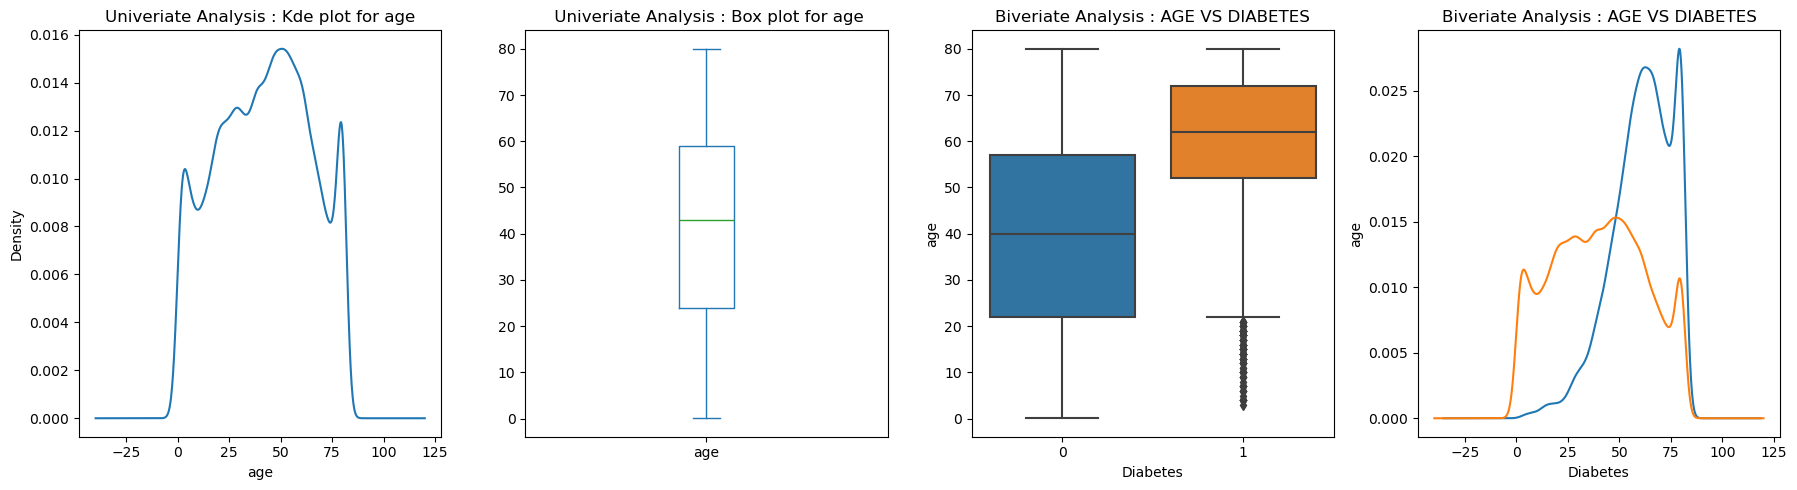

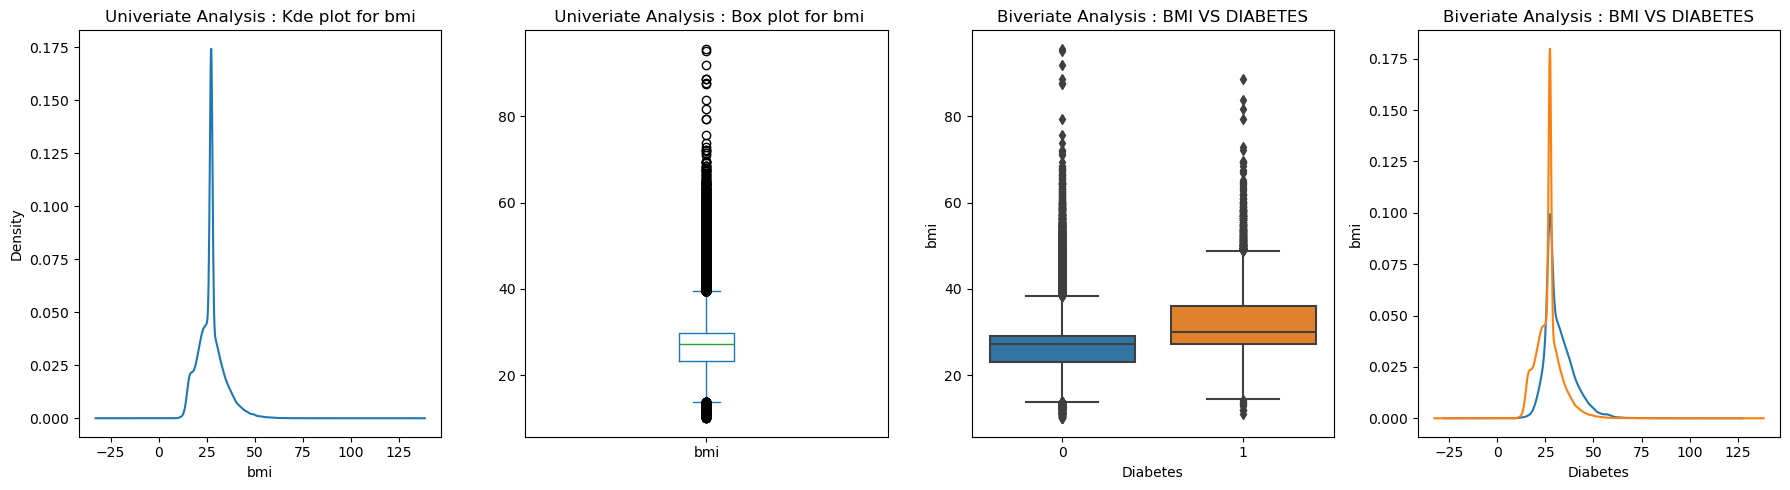

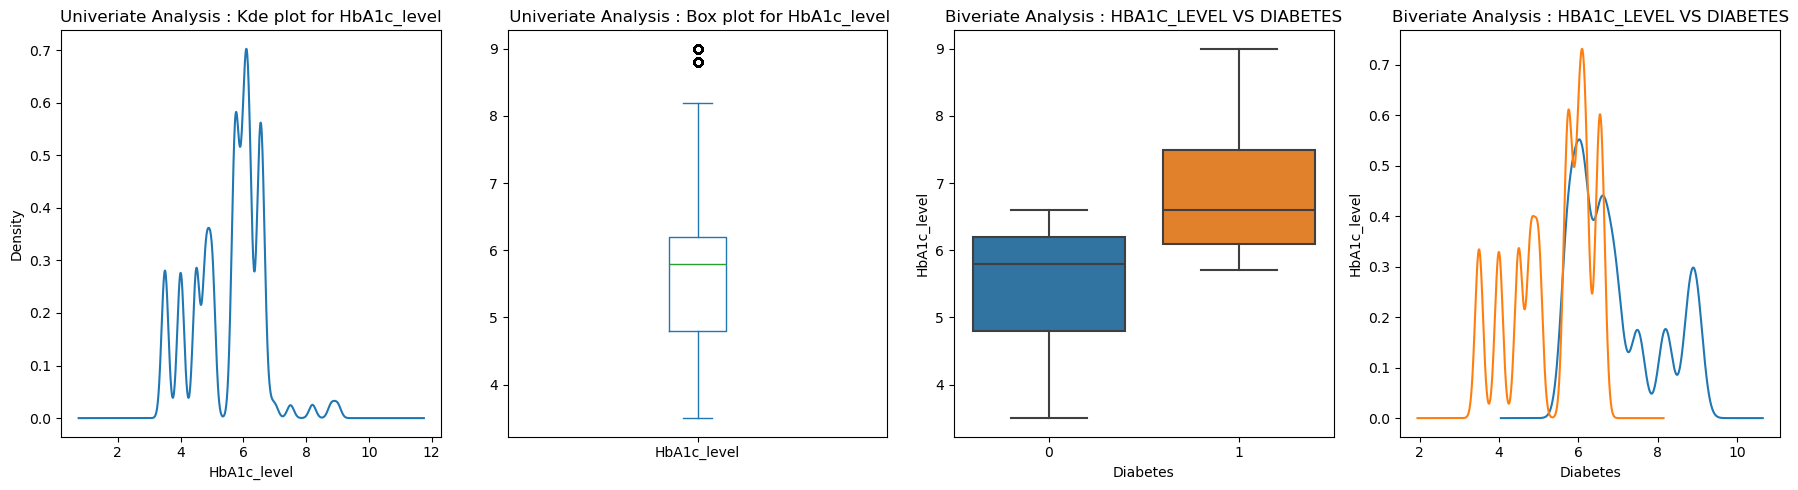

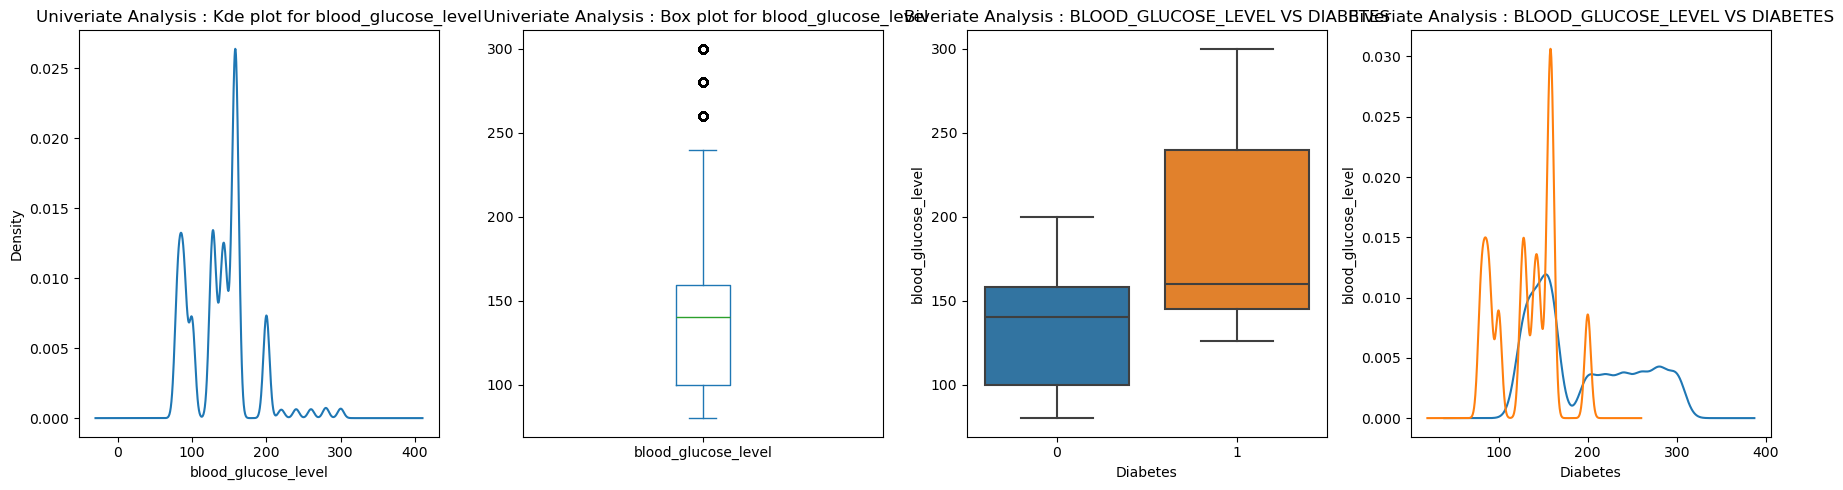

In [26]:
for i in con_col:
    plt.figure(figsize = (18,5))

    plt.subplot(1,4,1)
    df[i].plot(kind = 'kde')
    plt.xlabel(i)
    plt.title("Univeriate Analysis : Kde plot for {}".format(i))

    plt.subplot(1,4,2)
    df[i].plot(kind = 'box')
    plt.title(" Univeriate Analysis : Box plot for {}".format(i))

    plt.subplot(1,4,3)
    sns.boxplot(data = df, x = 'diabetes', y = i)
    plt.xlabel('Diabetes')
    plt.ylabel(i)
    plt.title("Biveriate Analysis : "+i.upper()+" VS DIABETES")

    plt.subplot(1,4,4)
    df[df['diabetes']==1][i].plot(kind = 'kde', label = 'Diabetic Patient')
    df[df['diabetes']==0][i].plot(kind = 'kde', label = 'Non Diabetic Patient')
    plt.xlabel('Diabetes')
    plt.ylabel(i)
    plt.title("Biveriate Analysis : "+i.upper()+" VS DIABETES")

    plt.tight_layout()
    plt.show()
    

In [27]:
cat_col.remove('diabetes')

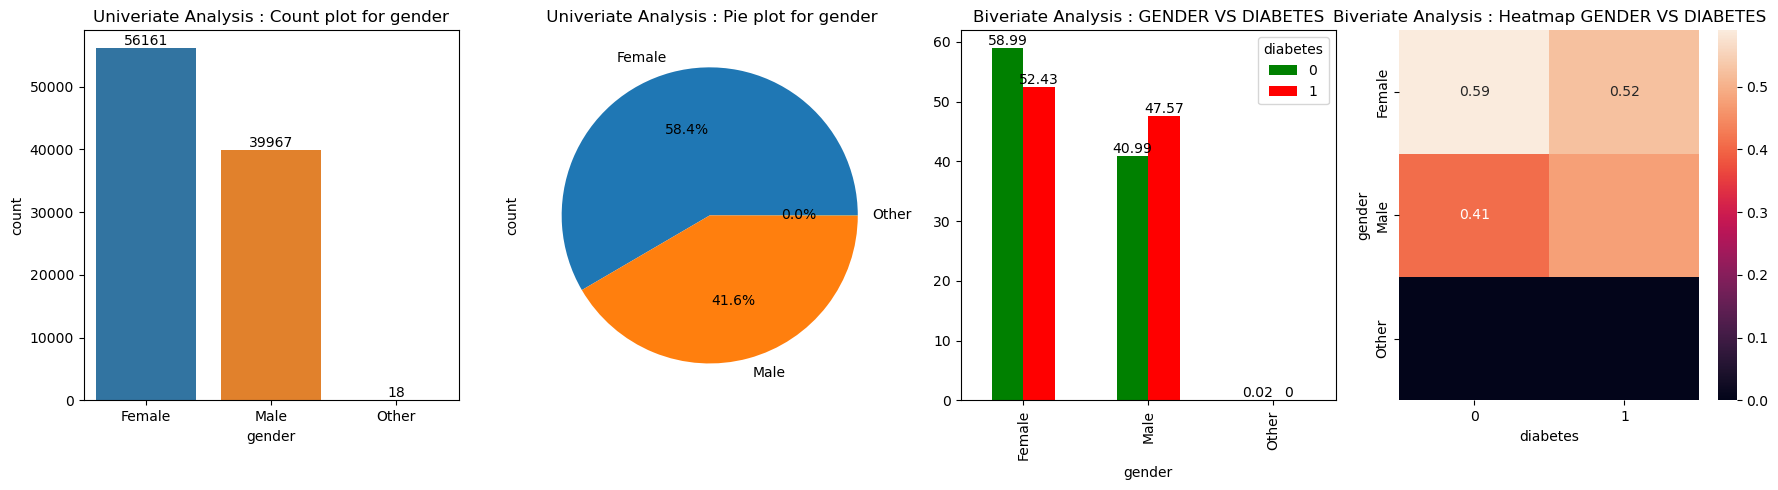

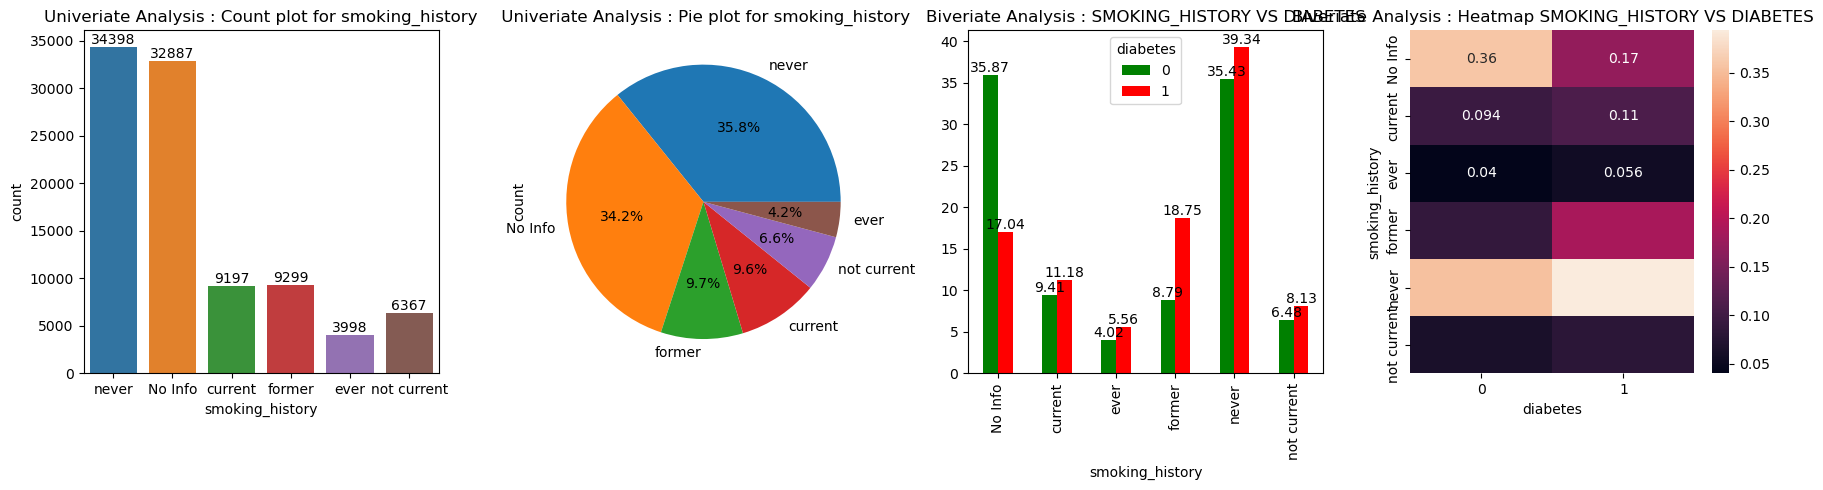

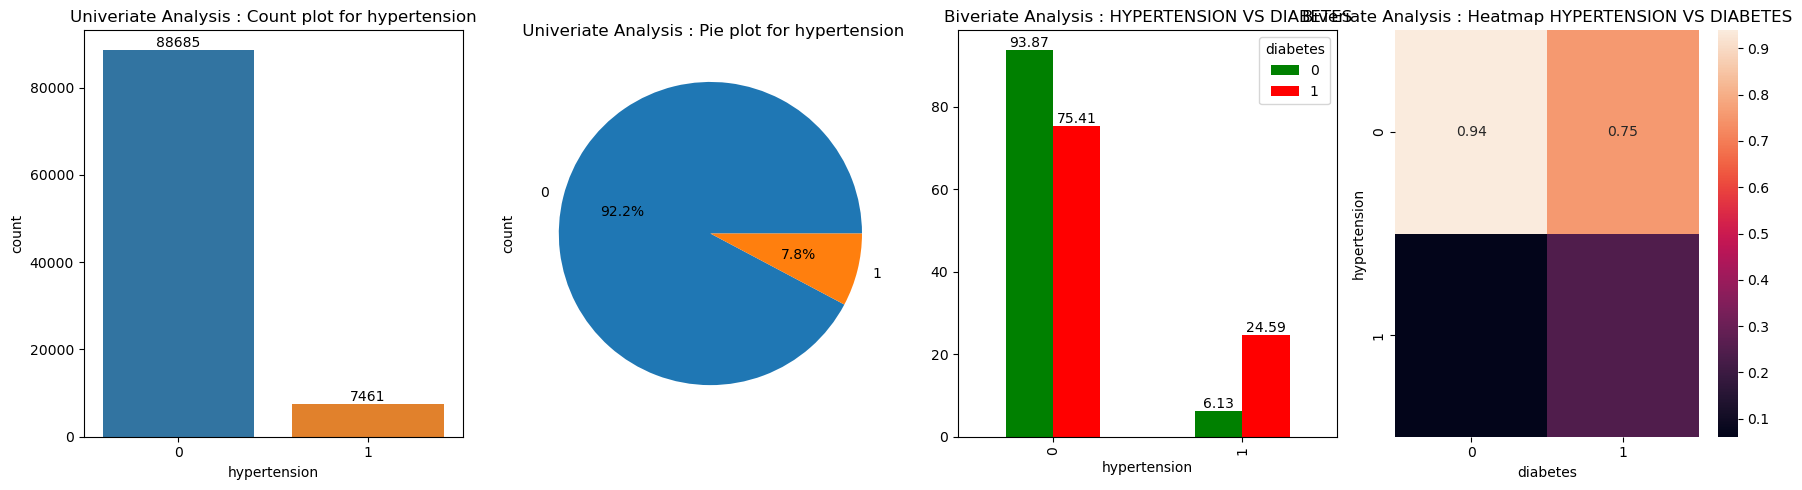

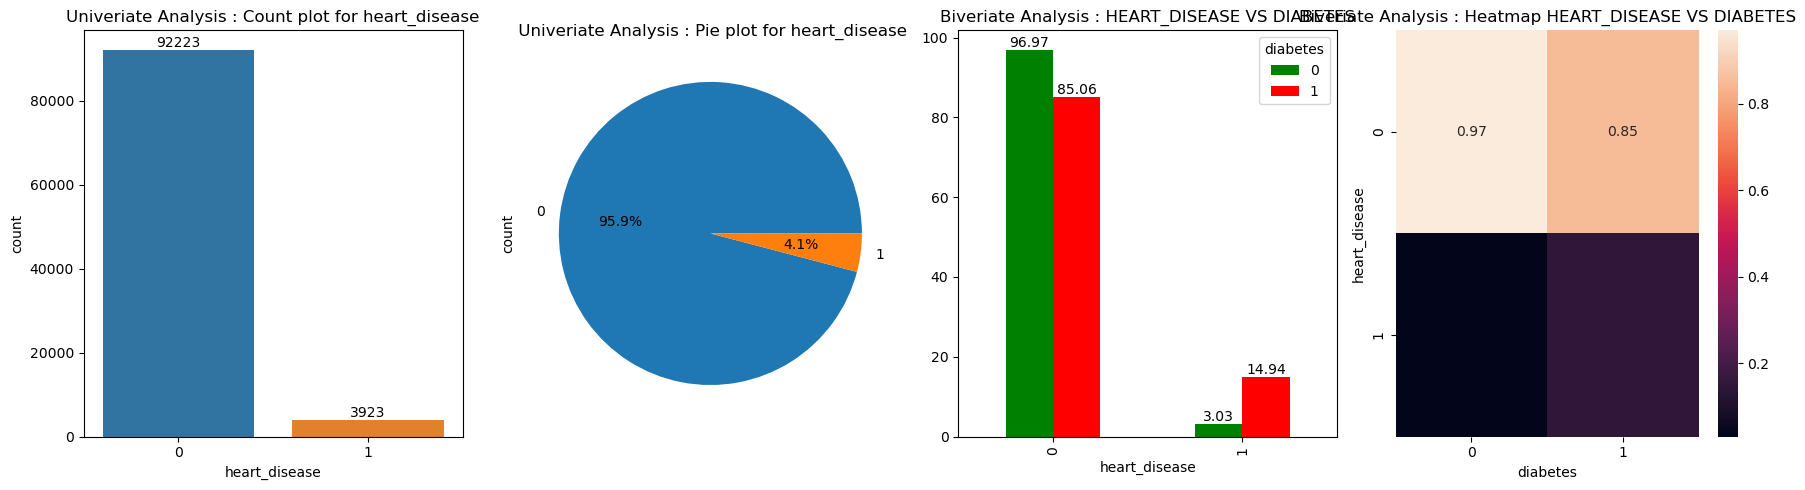

In [28]:
for i in cat_col:
    plt.figure(figsize = (18,5))

    plt.subplot(1,4,1)
    ax = sns.countplot(data = df,x = i)
    for j in ax.containers:
        ax.bar_label(j)
    plt.xlabel(i)
    plt.title("Univeriate Analysis : Count plot for {}".format(i))

    plt.subplot(1,4,2)
    df[i].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')
    plt.title(" Univeriate Analysis : Pie plot for {}".format(i))

    plt.subplot(1,4,3)
    cross = pd.crosstab(index = df[i],columns = df['diabetes'], normalize = 'columns').multiply(100).round(2)
    ax = cross.plot.bar(ax=plt.gca(), color=['green', 'red'])
    for k in ax.containers:
        ax.bar_label(k)
    plt.title("Biveriate Analysis : "+i.upper()+" VS DIABETES")    

    plt.subplot(1,4,4)
    sns.heatmap(pd.crosstab(index = df[i],columns = df['diabetes'], normalize = 'columns'),annot=True)
    plt.title("Biveriate Analysis : Heatmap "+i.upper()+" VS DIABETES")

    plt.tight_layout()
    plt.show()

## **Checking Outlier and Remove that**

age
0.25    24.0
0.50    43.0
0.75    59.0
0.80    63.0
0.85    67.0
0.90    73.0
0.95    80.0
0.99    80.0
1.00    80.0
Name: age, dtype: float64


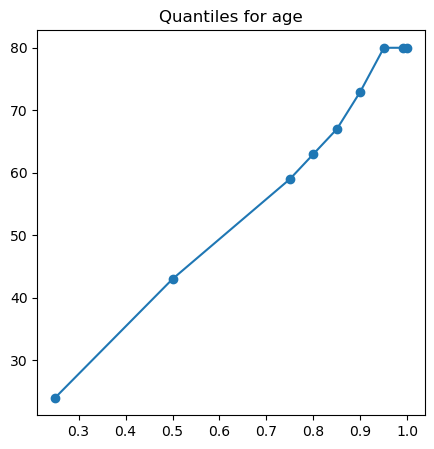

bmi
0.25    23.400
0.50    27.320
0.75    29.860
0.80    31.320
0.85    33.170
0.90    35.700
0.95    39.710
0.99    48.971
1.00    95.690
Name: bmi, dtype: float64


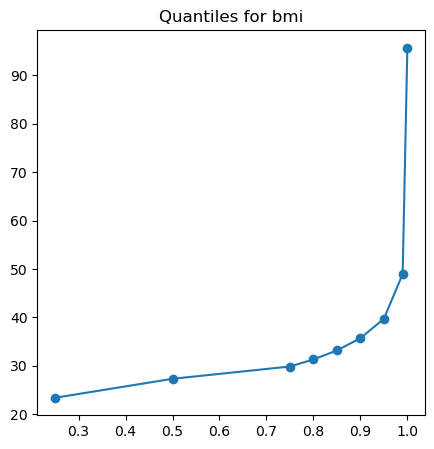

HbA1c_level
0.25    4.8
0.50    5.8
0.75    6.2
0.80    6.5
0.85    6.5
0.90    6.6
0.95    6.6
0.99    8.8
1.00    9.0
Name: HbA1c_level, dtype: float64


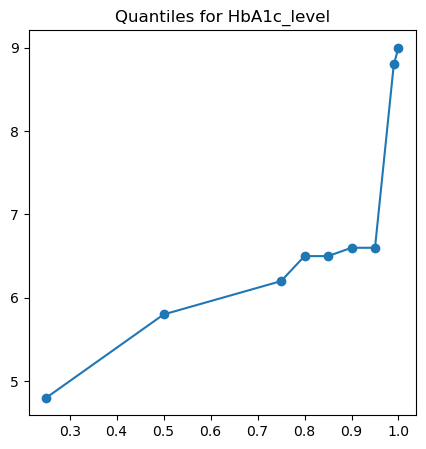

blood_glucose_level
0.25    100.0
0.50    140.0
0.75    159.0
0.80    159.0
0.85    160.0
0.90    200.0
0.95    200.0
0.99    280.0
1.00    300.0
Name: blood_glucose_level, dtype: float64


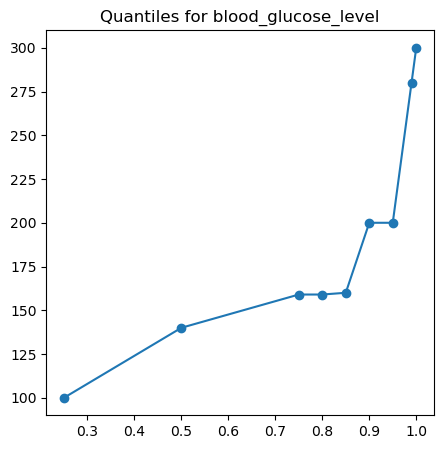

In [29]:
for i in con_col:
    print(i)
    quantiles = df[i].quantile([0.25, 0.5, 0.75,0.80,0.85, 0.9, 0.95, 0.99, 1])
    print(quantiles)
    
    # Plot the quantiles
    plt.figure(figsize = (5,5))
    quantiles.plot(marker = 'o')
    plt.title(f'Quantiles for {i}')
    plt.show()

In [30]:
for i in con_col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1

    Lower_bound = Q1-1.5*IQR
    Uppet_bound = Q3+1.5*IQR

    print("Lower_bound of {} is:- {}".format(i,Lower_bound))
    print("Upper_bound of {} is:- {}".format(i,Uppet_bound))
    df[i] = np.where(df[i]>Uppet_bound,Uppet_bound,np.where(df[i]<Lower_bound,Lower_bound,df[i]))
    print(df[i])
    print(min(df[i]))
    print(max(df[i]))
    print()

Lower_bound of age is:- -28.5
Upper_bound of age is:- 111.5
0        80.0
1        54.0
2        28.0
3        36.0
4        76.0
         ... 
99994    36.0
99996     2.0
99997    66.0
99998    24.0
99999    57.0
Name: age, Length: 96146, dtype: float64
0.08
80.0

Lower_bound of bmi is:- 13.709999999999997
Upper_bound of bmi is:- 39.55
0        25.19
1        27.32
2        27.32
3        23.45
4        20.14
         ...  
99994    24.60
99996    17.37
99997    27.83
99998    35.42
99999    22.43
Name: bmi, Length: 96146, dtype: float64
13.709999999999997
39.55

Lower_bound of HbA1c_level is:- 2.6999999999999993
Upper_bound of HbA1c_level is:- 8.3
0        6.6
1        6.6
2        5.7
3        5.0
4        4.8
        ... 
99994    4.8
99996    6.5
99997    5.7
99998    4.0
99999    6.6
Name: HbA1c_level, Length: 96146, dtype: float64
3.5
8.3

Lower_bound of blood_glucose_level is:- 11.5
Upper_bound of blood_glucose_level is:- 247.5
0        140.0
1         80.0
2        158.0
3    

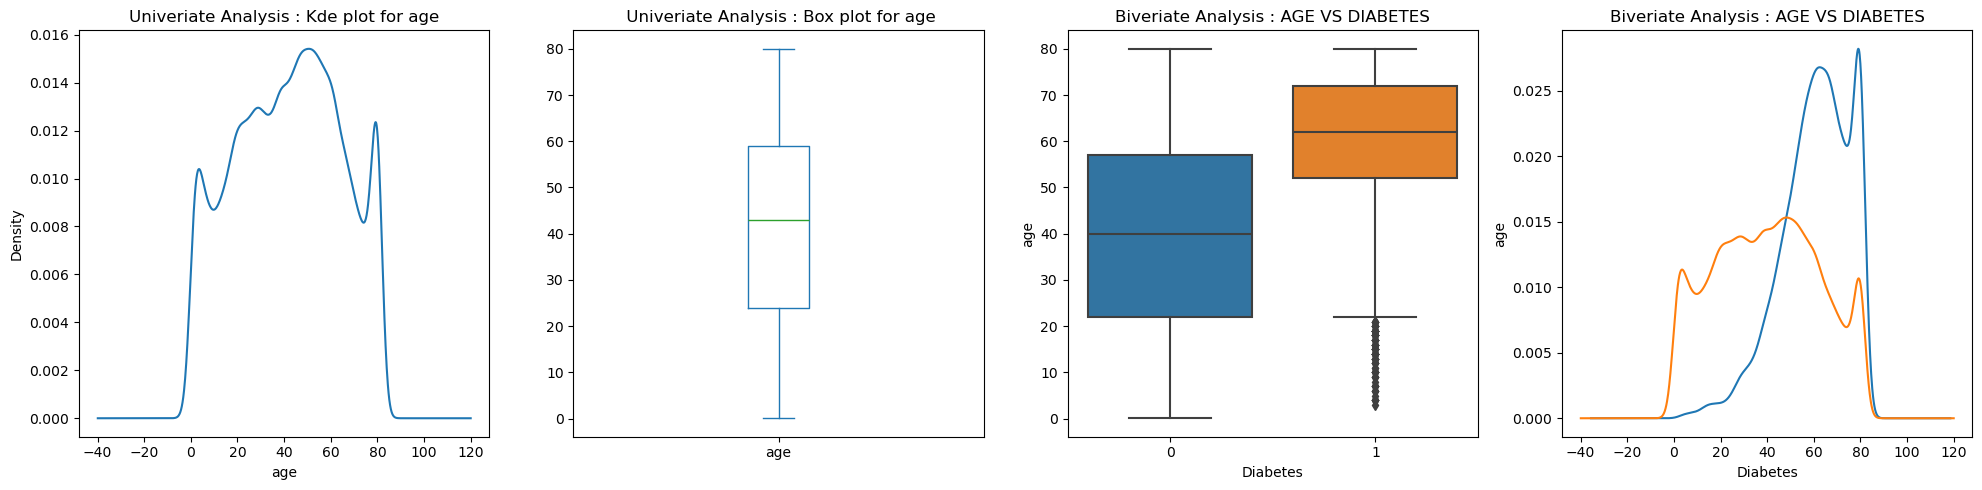

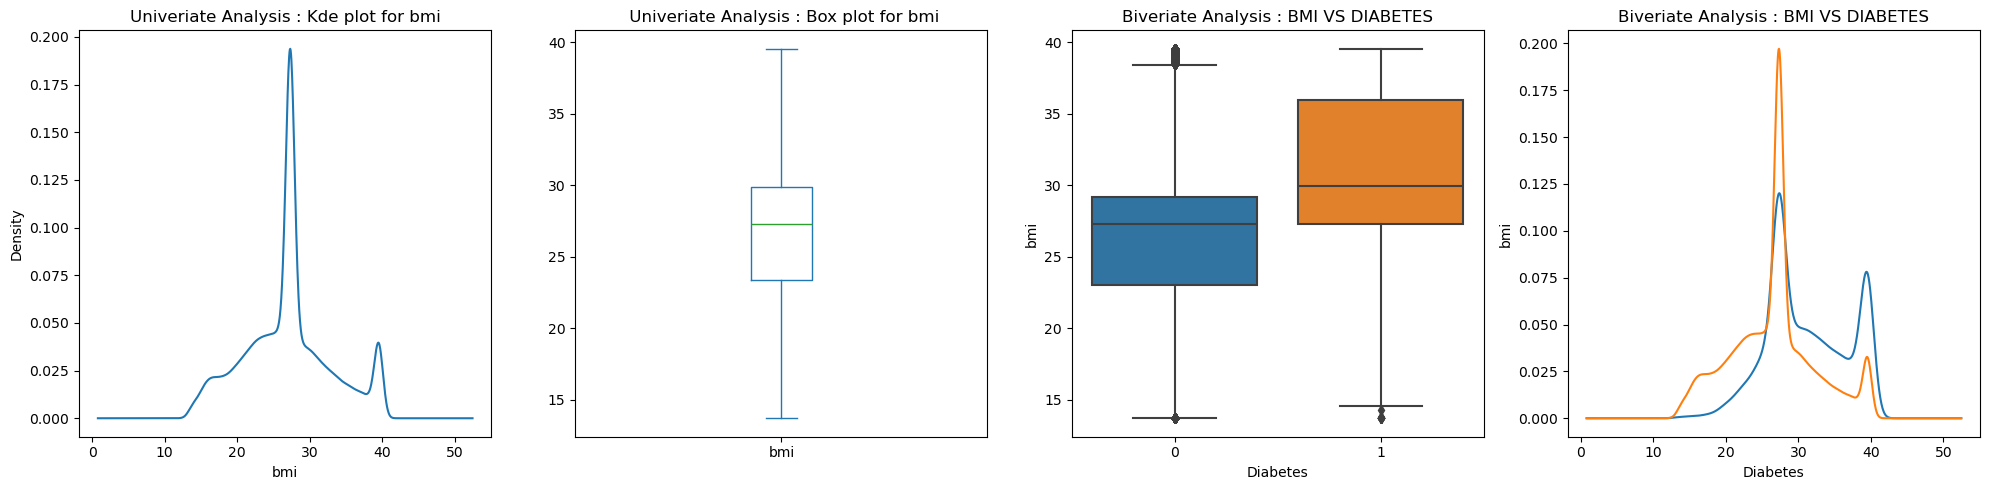

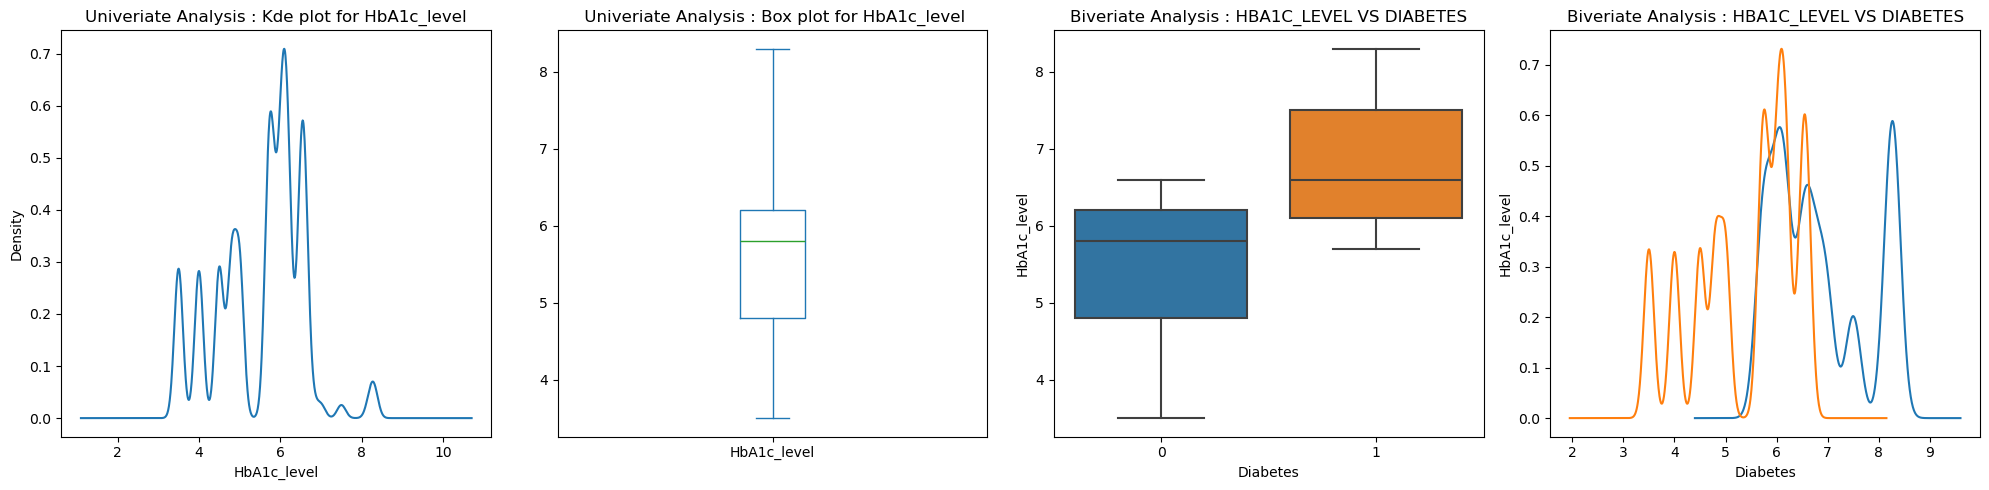

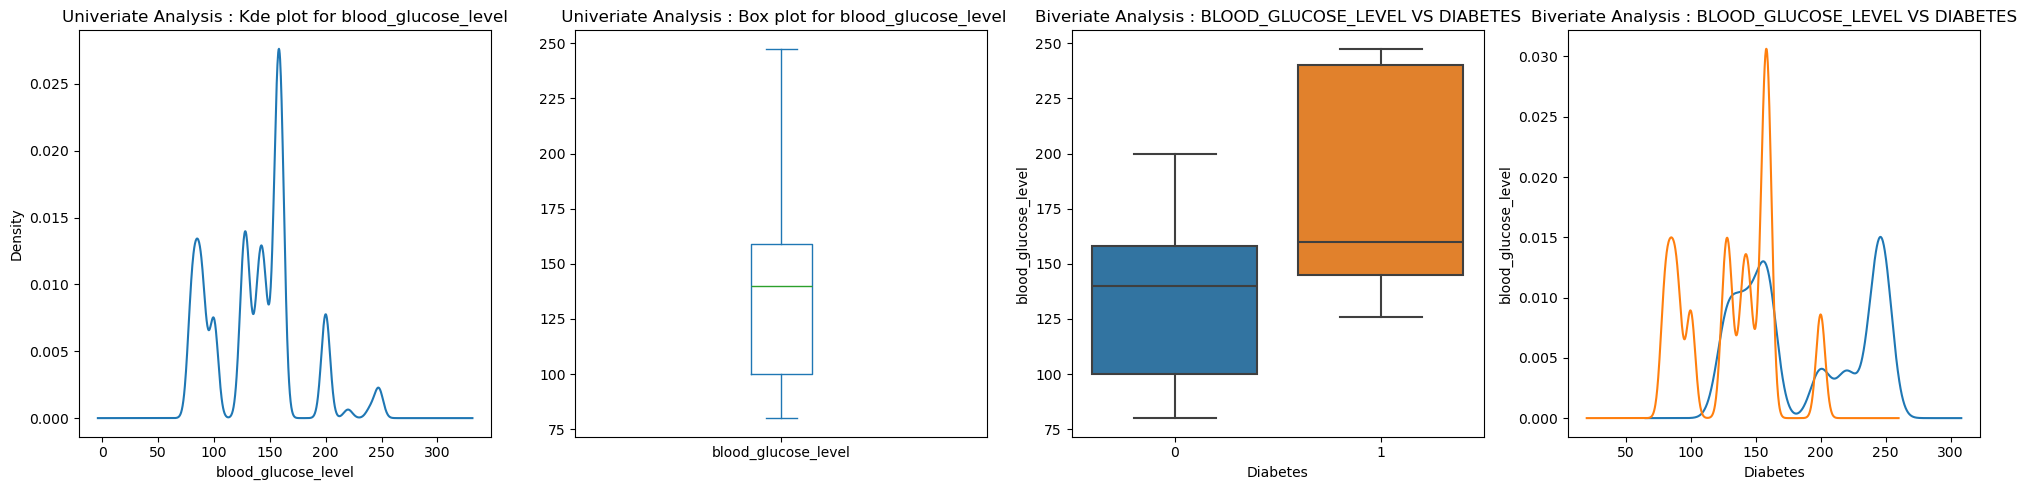

In [31]:
for i in con_col:
    plt.figure(figsize = (20,5))

    plt.subplot(1,4,1)
    df[i].plot(kind = 'kde')
    plt.xlabel(i)
    plt.title("Univeriate Analysis : Kde plot for {}".format(i))

    plt.subplot(1,4,2)
    df[i].plot(kind = 'box')
    plt.title(" Univeriate Analysis : Box plot for {}".format(i))

    plt.subplot(1,4,3)
    sns.boxplot(data = df, x = 'diabetes', y = i)
    plt.xlabel('Diabetes')
    plt.ylabel(i)
    plt.title("Biveriate Analysis : "+i.upper()+" VS DIABETES")

    plt.subplot(1,4,4)
    df[df['diabetes']==1][i].plot(kind = 'kde', label = 'Diabetic Patient')
    df[df['diabetes']==0][i].plot(kind = 'kde', label = 'Non Diabetic Patient')
    plt.xlabel('Diabetes')
    plt.ylabel(i)
    plt.title("Biveriate Analysis : "+i.upper()+" VS DIABETES")

    plt.tight_layout()
    plt.show()

### Checking the Skewness

In [32]:
for i in con_col:
    print(i,df[i].skew())

age -0.062444736060842554
bmi 0.17713135400064914
HbA1c_level -0.23637666619145153
blood_glucose_level 0.43231586782421405


In [33]:
max(df['age'])

80.0

### Feature Engineering

In [34]:
def age_group(data):
    if data <20:
        return "Less than 20"
    elif data>=20 and data<=40:
        return "20-40"
    elif data>40 and data<=60:
        return "40-60"
    else:
        return "60+"

In [35]:
df['age_group'] = df['age'].apply(age_group)

In [36]:
def bmi_group(data):
    if data <25:
        return "Below 25"
    elif data>=25 and data<=27:
        return "25-27"
    elif data>27 and data<=30:
        return "27-30"
    elif data>30 and data<=33: 
        return "30-33"
    elif data>33 and data<=35: 
        return "33-35"    
    else:
        return "35++"

In [37]:
df['bmi_group'] = df['bmi'].apply(bmi_group)

In [38]:
def glucose_level(data):
    if data<100:
        return "Below 100"
    elif data>=100 and data<=150:
        return "100-150"
    elif data>150 and data<=200:
        return "150-200"
    else :
        return "200+"

In [39]:
df['glucose_group'] = df['blood_glucose_level'].apply(glucose_level)

In [40]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group',
       'bmi_group', 'glucose_group'],
      dtype='object')

In [41]:
new_cat_col = ['age_group','bmi_group', 'glucose_group']

In [42]:
cat_col = cat_col+new_cat_col

In [43]:
cat_col

['gender',
 'smoking_history',
 'hypertension',
 'heart_disease',
 'age_group',
 'bmi_group',
 'glucose_group']

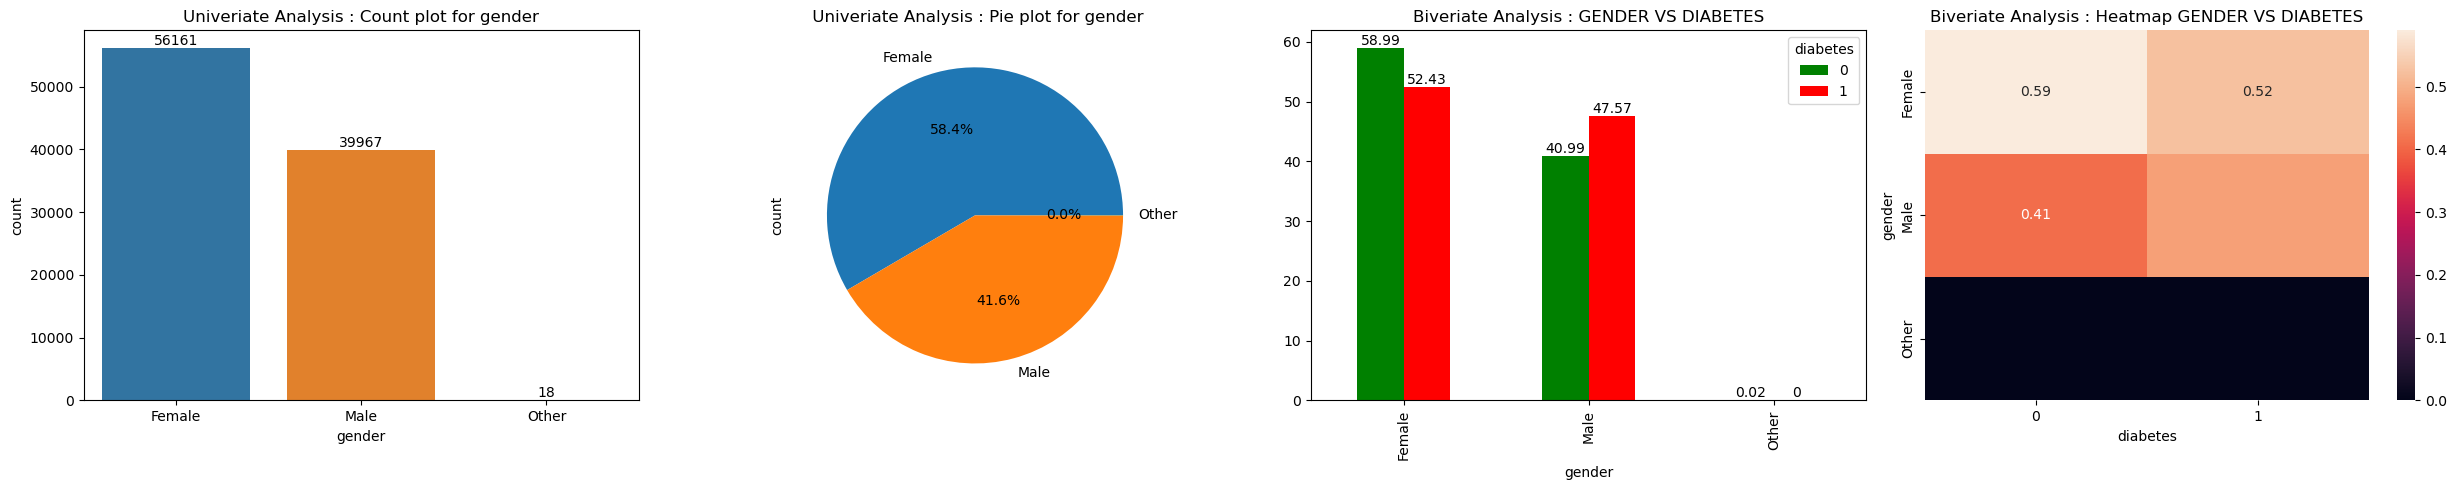

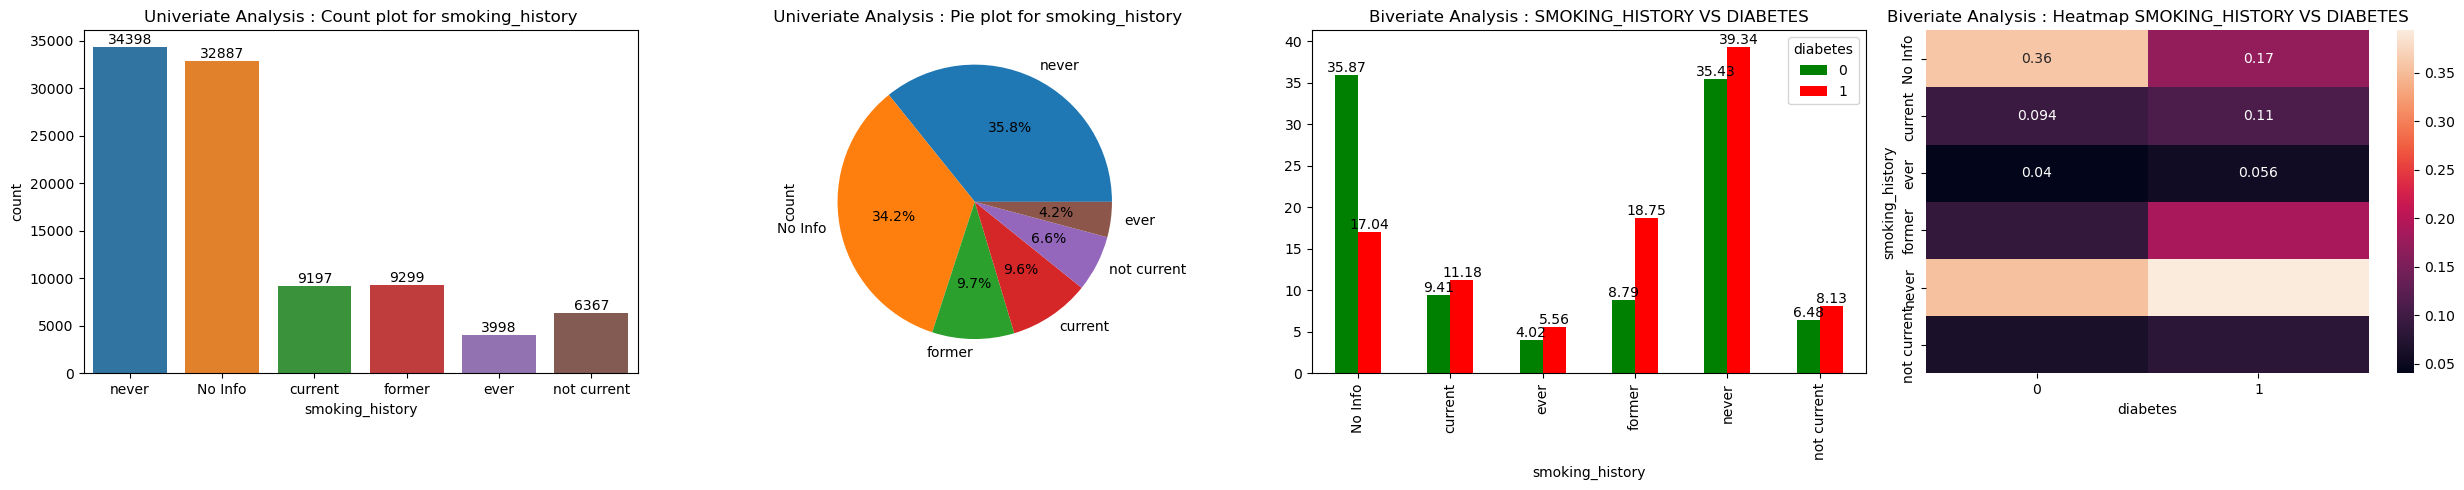

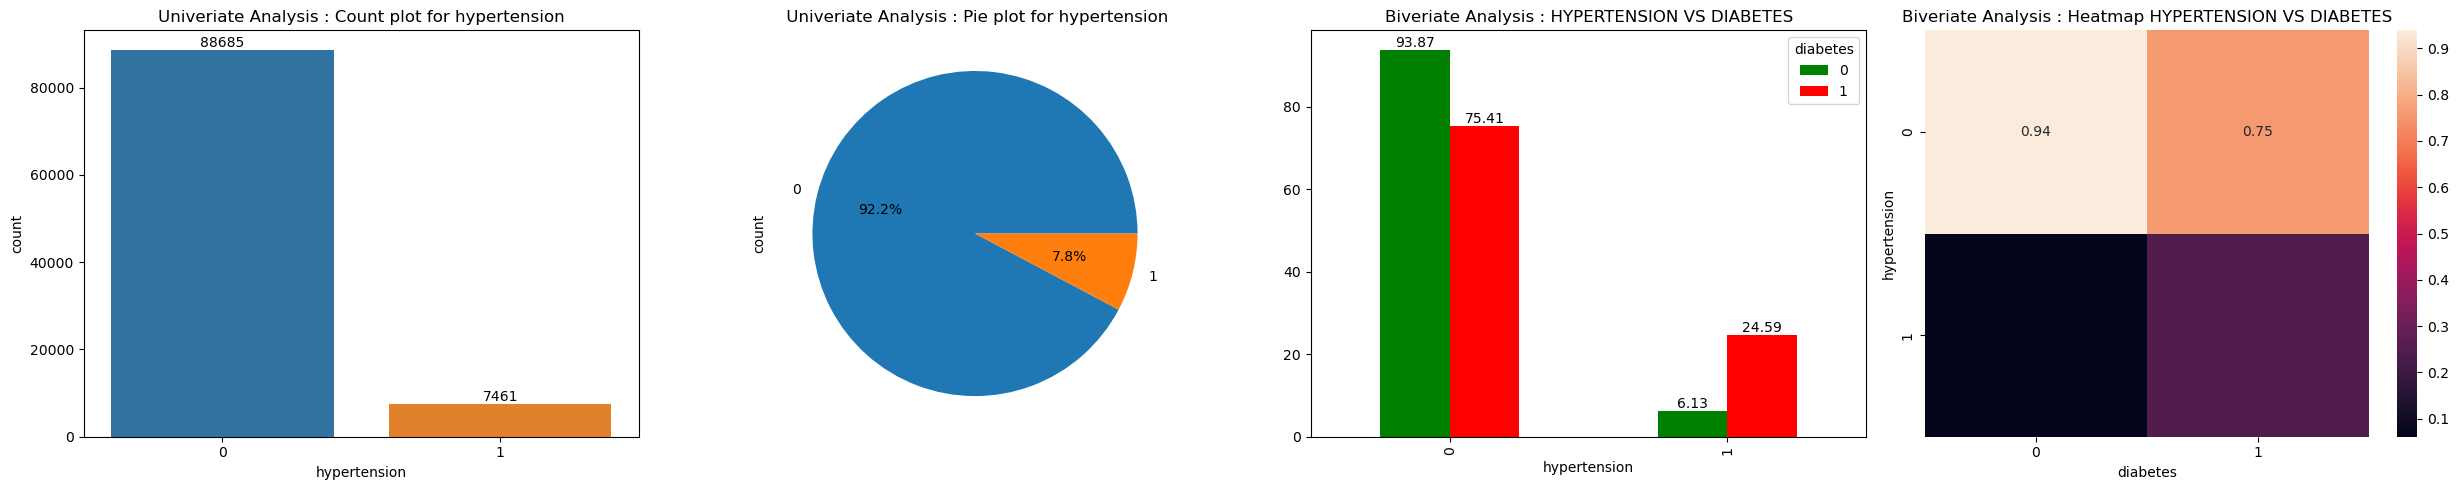

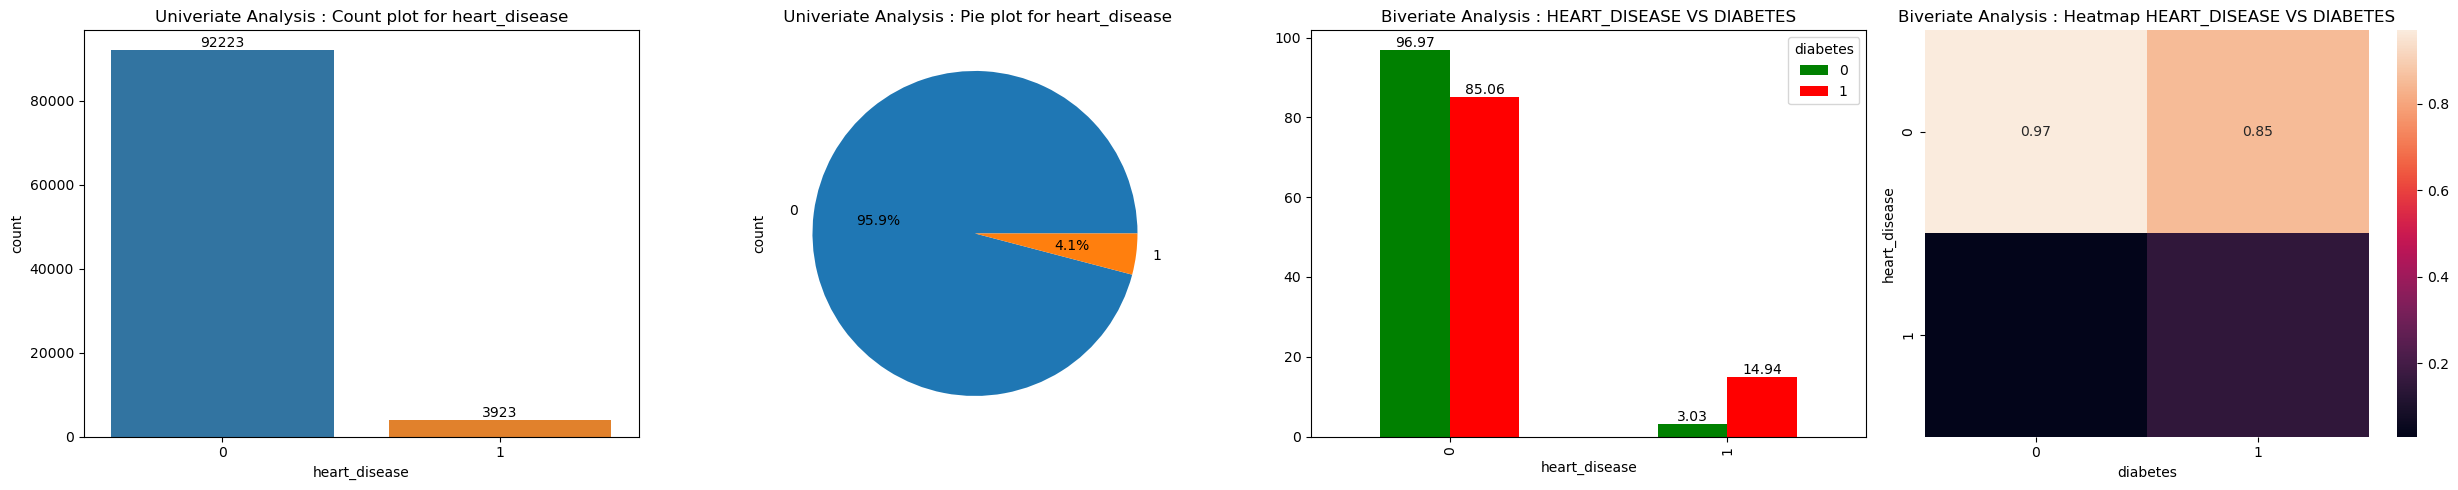

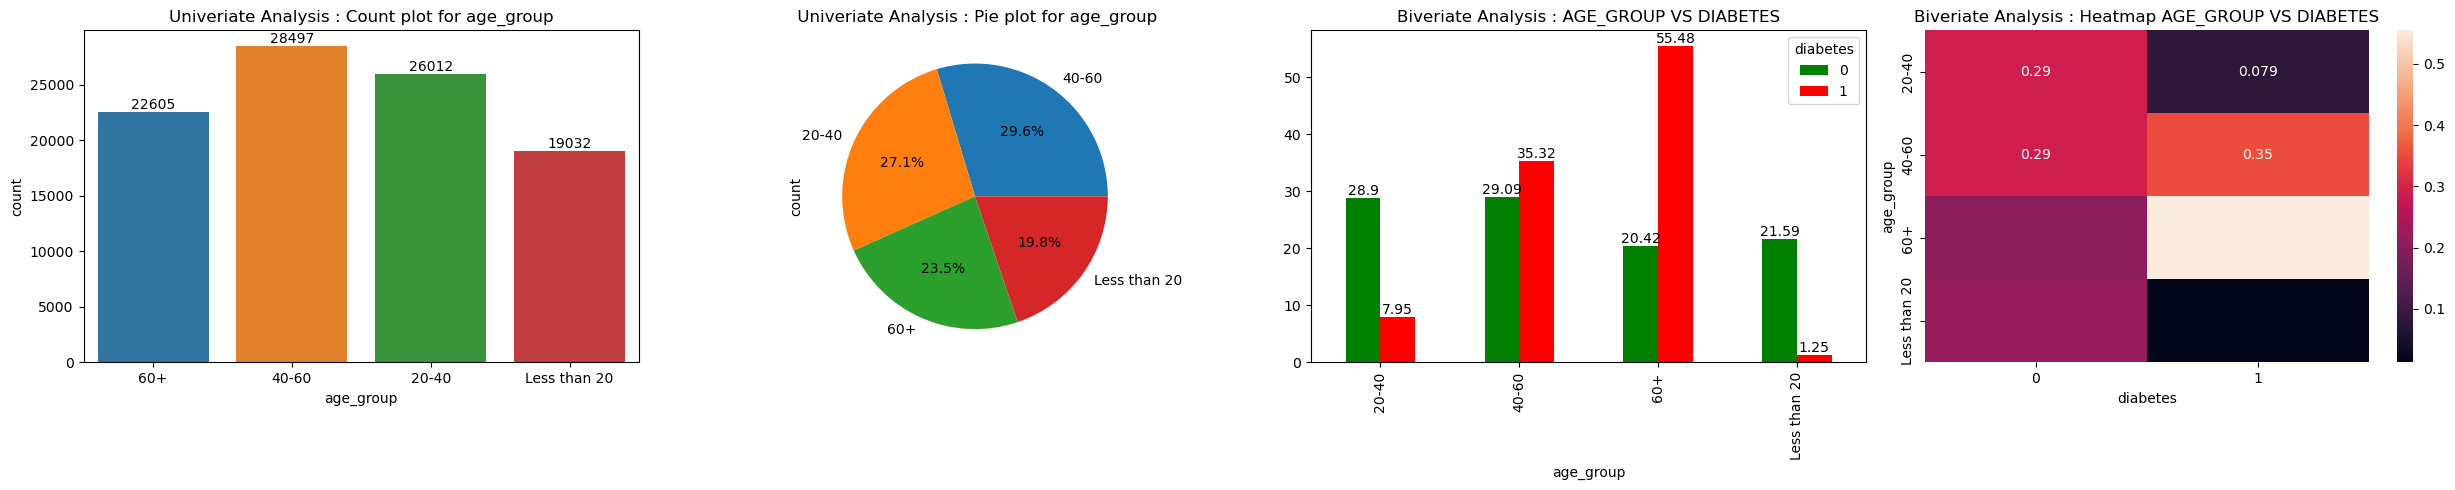

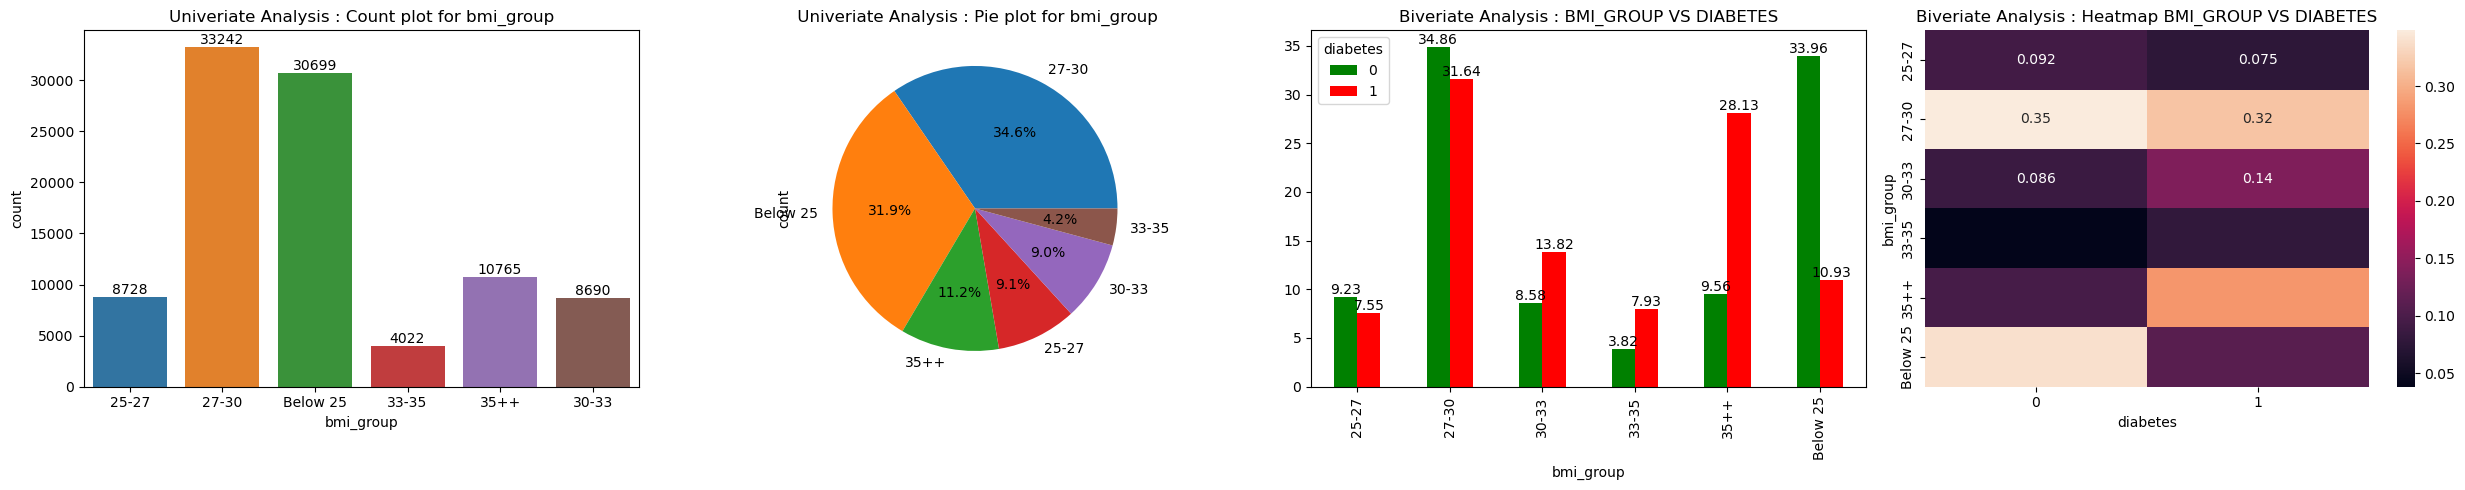

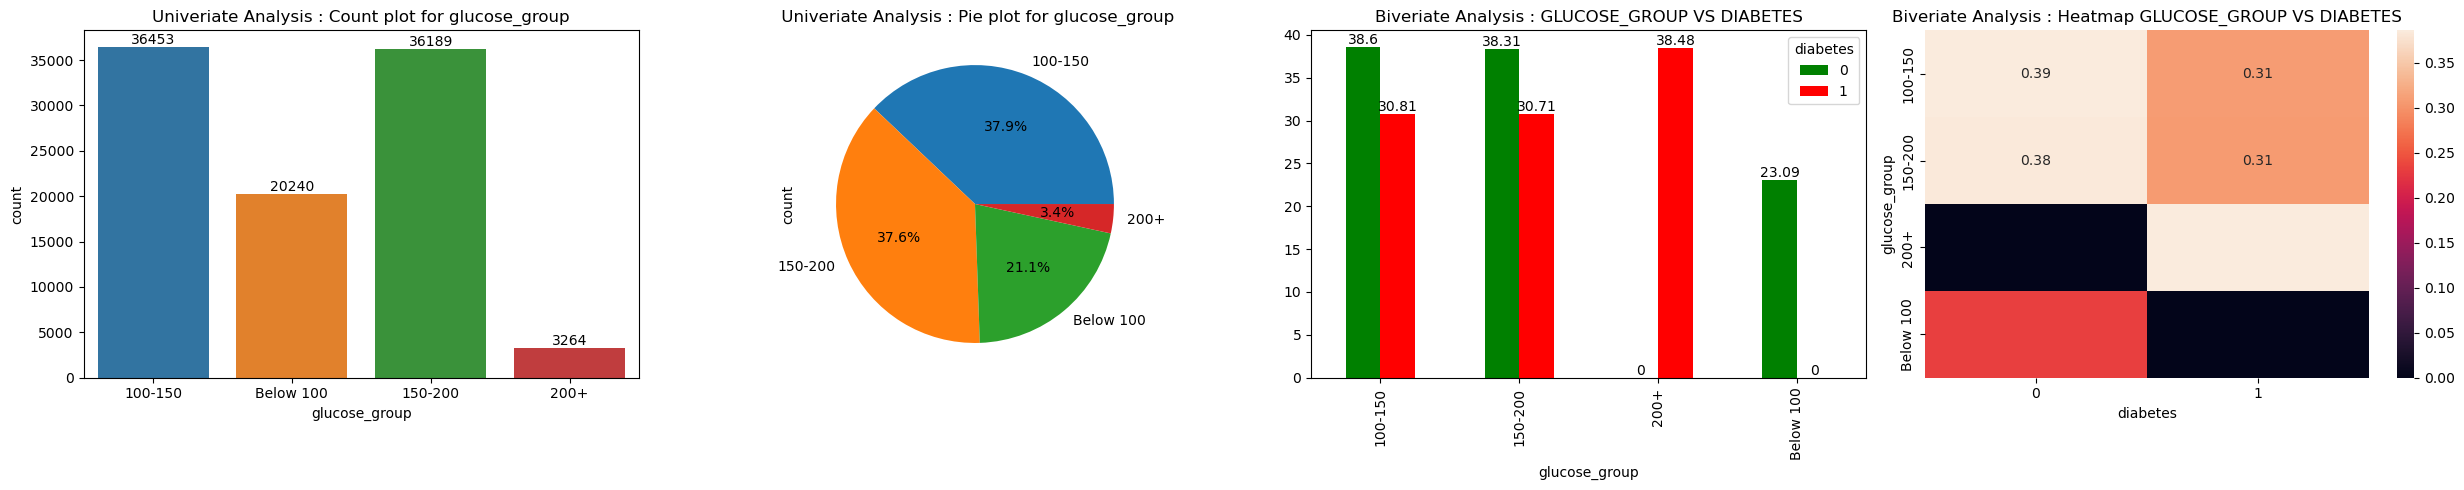

In [44]:
for i in cat_col:
    plt.figure(figsize = (25,5))

    plt.subplot(1,4,1)
    ax = sns.countplot(data = df,x = i)
    for j in ax.containers:
        ax.bar_label(j)
    plt.xlabel(i)
    plt.title("Univeriate Analysis : Count plot for {}".format(i))

    plt.subplot(1,4,2)
    df[i].value_counts().plot(kind = 'pie',autopct = '%0.1f%%')
    plt.title(" Univeriate Analysis : Pie plot for {}".format(i))

    plt.subplot(1,4,3)
    cross = pd.crosstab(index = df[i],columns = df['diabetes'], normalize = 'columns').multiply(100).round(2)
    ax = cross.plot.bar(ax=plt.gca(), color=['green', 'red'])
    for k in ax.containers:
        ax.bar_label(k)
    plt.title("Biveriate Analysis : "+i.upper()+" VS DIABETES")    

    plt.subplot(1,4,4)
    sns.heatmap(pd.crosstab(index = df[i],columns = df['diabetes'], normalize = 'columns'),annot=True)
    plt.title("Biveriate Analysis : Heatmap "+i.upper()+" VS DIABETES")

    plt.tight_layout()
    plt.show()

In [45]:
df = df[df['gender']!='Other']

In [46]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group',
       'bmi_group', 'glucose_group'],
      dtype='object')

In [47]:
con_col

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [48]:
con_col = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
items_to_remove = ['age', 'bmi', 'blood_glucose_level']

# Using a loop to remove multiple items
for item in items_to_remove:
    if item in con_col:
        con_col.remove(item)

print(con_col)

['HbA1c_level']


In [49]:
con_col

['HbA1c_level']

### ANOVA TEST

In [50]:
def AnovaTest(inpdata,targetvariable,predictor):
    from scipy.stats import f_oneway
    selectedcol = []

    for i in predictor:
        group = inpdata.groupby(targetvariable)[i].apply(list)
        anovaresult = f_oneway(*group)
        
        if anovaresult[1]<0.05:
            selectedcol.append(i)
            print('The {} is correlated with {} and the P-value is {}'.format(i,targetvariable,anovaresult[1]))
        
        else:
            
            print('The {} is not correlated with {} and the P-value is {}'.format(i,targetvariable,anovaresult[1]))
    return(selectedcol)

In [51]:
AnovaTest(inpdata = df,targetvariable = 'diabetes',predictor = con_col)

The HbA1c_level is correlated with diabetes and the P-value is 0.0


['HbA1c_level']

## CHISQUARE TEST

In [52]:
def ChiTest(inpdata,targetvariable,predictor):
    
    from scipy.stats import chi2_contingency
    selectedcol = []
    
    for i in predictor:
        cross = pd.crosstab(index = inpdata[i], columns = inpdata[targetvariable])
        chisquare = chi2_contingency(cross)
        
        if chisquare[1]<0.05:
            selectedcol.append(i)
            print('The {} is correlated with {} and the P-value is {}'.format(i,targetvariable,chisquare[1]))

        else:
            print('The {} is not correlated with {} and the P-value is {}'.format(i,targetvariable,chisquare[1]))
    return(selectedcol) 

In [53]:
ChiTest(inpdata = df,targetvariable = 'diabetes',predictor = cat_col)

The gender is correlated with diabetes and the P-value is 1.0112949442961092e-31
The smoking_history is correlated with diabetes and the P-value is 0.0
The hypertension is correlated with diabetes and the P-value is 0.0
The heart_disease is correlated with diabetes and the P-value is 0.0
The age_group is correlated with diabetes and the P-value is 0.0
The bmi_group is correlated with diabetes and the P-value is 0.0
The glucose_group is correlated with diabetes and the P-value is 0.0


['gender',
 'smoking_history',
 'hypertension',
 'heart_disease',
 'age_group',
 'bmi_group',
 'glucose_group']

#### Final Selected Columns are 
* 'gender'
* 'smoking_history'
* 'hypertension'
* 'heart_disease'
* 'age_group'
* 'bmi_group'
* 'glucose_group'
* 'HbA1c_level'

In [54]:
df = df[['gender','smoking_history','hypertension','heart_disease','age_group','bmi_group','glucose_group','HbA1c_level','diabetes']]

In [55]:
df.head()

,gender,smoking_history,hypertension,heart_disease,age_group,bmi_group,glucose_group,HbA1c_level,diabetes
0,Female,never,0,1,60+,25-27,100-150,6.6,0
1,Female,No Info,0,0,40-60,27-30,Below 100,6.6,0
2,Male,never,0,0,20-40,27-30,150-200,5.7,0
3,Female,current,0,0,20-40,Below 25,150-200,5.0,0
4,Male,current,1,1,60+,Below 25,150-200,4.8,0


In [56]:
df.to_csv('Diabetes.csv')

In [57]:
df = pd.read_csv('Diabetes.csv')

In [2]:
import pickle

In [62]:
df.to_pickle('Diabetes.pkl')

In [3]:
df = pd.read_pickle('Diabetes.pkl')

In [49]:
df[df['diabetes']==1]

,Unnamed: 0,gender,smoking_history,hypertension,heart_disease,age_group,bmi_group,glucose_group,HbA1c_level,diabetes
6,6,Female,never,0,0,40-60,Below 25,150-200,6.5,1
26,26,Male,not current,0,1,60+,27-30,150-200,6.5,1
38,38,Male,current,1,0,40-60,27-30,200+,5.7,1
40,40,Male,former,0,0,60+,25-27,150-200,8.3,1
53,53,Female,former,0,0,40-60,27-30,150-200,7.0,1
...,...,...,...,...,...,...,...,...,...,...
96072,99935,Female,never,1,1,60+,33-35,100-150,8.2,1
96075,99938,Male,former,0,1,40-60,30-33,200+,6.2,1
96093,99957,Female,No Info,0,0,60+,33-35,200+,6.5,1
96098,99962,Female,never,1,0,40-60,35++,150-200,7.0,1


In [7]:
predictor = ['gender','smoking_history','hypertension','heart_disease','age_group','bmi_group','glucose_group','HbA1c_level']
target = ['diabetes']

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [5]:
trans = ColumnTransformer(transformers = [
    ('trans1',OneHotEncoder(sparse = False, drop = 'first'),['gender','smoking_history','age_group','bmi_group','glucose_group'])
],remainder = 'passthrough')

In [8]:
X = df[predictor]
y = df[target]

In [9]:
X_transform = trans.fit_transform(X)

In [10]:
X_transform.shape

(96128, 20)

In [11]:
from sklearn.model_selection import train_test_split 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size = 0.2, random_state = 42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76902, 20)
(19226, 20)
(76902, 1)
(19226, 1)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [77]:
from sklearn.model_selection import GridSearchCV

#### Logistic Regression

In [112]:
LR = LogisticRegression()

In [111]:
param_log = {
    'C':[1,3,5,7],
    'penalty':['l1','l2'],
    'solver':['newton-cg','sag','saga','lbfs','liblinear']
}

In [113]:
GridSearch = GridSearchCV(LR,param_log,cv = 5, n_jobs = 1)
GridSearch_Result_L = GridSearch.fit(X_train,y_train)

In [114]:
GridSearch_Result_L.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [115]:
GridSearch_Result_L.best_score_

0.9647603265440979

#### Decision Tree

In [116]:
DT = DecisionTreeClassifier()

In [117]:
param_tree = {
    'max_depth':[1,3,5,7],
    'criterion':['gini','entropy']
}

In [118]:
GridSearch = GridSearchCV(DT,param_tree,cv = 5, n_jobs = 1)
GridSearch_result_D = GridSearch.fit(X_train,y_train)

In [119]:
GridSearch_result_D.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [120]:
GridSearch_result_D.best_score_

0.9711320715634754

#### Random Forest

In [121]:
RF = RandomForestClassifier()

In [122]:
param_RF = {
    'max_depth':[1,3,5,7],
    'criterion':['gini','entropy'],
    'n_estimators':[100,200]
}

In [123]:
GridSearch = GridSearchCV(RF,param_RF,cv = 5, n_jobs = 1)
GridSearch_result_RD = GridSearch.fit(X_train,y_train)

In [124]:
GridSearch_result_RD.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

In [125]:
GridSearch_result_RD.best_score_

0.9711320715634754

#### Adaboost

In [126]:
AB = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion= 'gini', max_depth= 3))

In [127]:
param_ab = {
    'learning_rate':[0.01,0.03,0.05],
    'n_estimators':[100,200]
}

In [128]:
GridSearch = GridSearchCV(AB, param_ab, cv = 5, n_jobs = 1)
GridSearch_result_AB = GridSearch.fit(X_train,y_train)

In [130]:
GridSearch_result_AB.best_params_

{'learning_rate': 0.05, 'n_estimators': 100}

In [131]:
GridSearch_result_AB.best_score_

0.9711450754646458

#### XG Boost

In [129]:
XGB = XGBClassifier()

In [132]:
param_xgb = {
    'learning_rate':[0.01,0.03,0.05],
    'n_estimators':[100,200],
    'max_depth':[1,3,5],
    'objective':['reg:linear'],
    'booster':['gbtree','gblinear']
}

In [133]:
GridSearch = GridSearchCV(XGB, param_xgb, cv = 5, n_jobs = 1)
GridSearch_result_xgb = GridSearch.fit(X_train,y_train)

In [134]:
GridSearch_result_xgb.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.01,
 'max_depth': 1,
 'n_estimators': 200,
 'objective': 'reg:linear'}

In [135]:
GridSearch_result_xgb.best_score_

0.9711320715634754

### KNN

In [137]:
KNN = KNeighborsClassifier()

In [138]:
param_knn = {
    'n_neighbors':[1,3,5,7,9]
}

In [139]:
GridSearch = GridSearchCV(KNN, param_knn, cv = 5, n_jobs = 1)
GridSearch_result = GridSearch.fit(X_train,y_train)

In [141]:
GridSearch_result.best_params_

{'n_neighbors': 9}

In [142]:
GridSearch_result.best_score_

0.961314397570035

## Model Building

In [15]:
model = {
    'LogisticRegression': LogisticRegression(C= 1, penalty= 'l2', solver = 'newton-cg'),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth = 3, criterion = 'gini'),
    'RandomForestClassifier':RandomForestClassifier(max_depth = 5, n_estimators = 100, criterion = 'gini'),
    'AdaBoostClassifier':AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3, criterion = 'gini'), n_estimators = 100, learning_rate = 0.05),
    'XGBClassifier':XGBClassifier(max_depth = 1, n_estimators = 200, learning_rate = 0.01, objective = 'reg:linear', booster = 'gbtree'),
    'SVM':SVC(C = 10, kernel = 'rbf',gamma = 'auto'),
    'KNN' : KNeighborsClassifier(n_neighbors = 9)
}

In [16]:
for i in model:
    print(i)
    clf = model[i].fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    
    from sklearn import metrics
    print(metrics.classification_report(y_test,y_pred))
    print(metrics.confusion_matrix(y_test,y_pred))
    
    
    print('Accuracy Recall-Score for {} is :'.format(i), metrics.recall_score(y_test, y_pred, average = 'weighted'))
    
    from sklearn.model_selection import cross_val_score
    
    Accuracy_Values=cross_val_score(clf, X_transform , y, cv=5, scoring='recall_weighted')
    print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
    print('\nFinal Average Accuracy of the model for {} is :'.format(i), round(Accuracy_Values.mean(),2))
    print()

LogisticRegression
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17525
           1       0.94      0.63      0.75      1701

    accuracy                           0.96     19226
   macro avg       0.95      0.81      0.87     19226
weighted avg       0.96      0.96      0.96     19226

[[17454    71]
 [  634  1067]]
Accuracy Recall-Score for LogisticRegression is : 0.9633309060647041

Accuracy values for 5-fold Cross Validation:
 [0.96515136 0.96619162 0.96270675 0.96442133 0.96348505]

Final Average Accuracy of the model for LogisticRegression is : 0.96

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       1.00      0.65      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226

[[17525     0]
 [  591  1110]

## Final selected model is Decision Tree

In [38]:
trans1 = ColumnTransformer(transformers = [
    ('trans1',OneHotEncoder(sparse = False, drop = 'first'),['gender','smoking_history','age_group','bmi_group','glucose_group'])
],remainder = 'passthrough')

In [39]:
DT = DecisionTreeClassifier(max_depth = 3, criterion = 'gini')

In [40]:
from sklearn.pipeline import make_pipeline

In [41]:
pipe = make_pipeline(trans1,DT)

In [42]:
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trans1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['gender', 'smoking_history',
                                                   'age_group', 'bmi_group',
                                                   'glucose_group'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3))])

In [45]:
np.unique(pipe.predict(X))

array([0, 1], dtype=int64)

In [46]:
y_pred = pipe.predict(X)

In [47]:
import pickle

pickle.dump(pipe,open('DT_Diabetes.pkl','wb'))

In [62]:
pipe.predict(pd.DataFrame([['Female','current',1,1,'40-60','25-27','150-200',7.0]], columns = ['gender','smoking_history','hypertension','heart_disease','age_group','bmi_group','glucose_group','HbA1c_level']))

array([1], dtype=int64)

In [1]:
pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.4 MB/s eta 0:00:09
   - -------------------------------------- 0.4/11.0 MB 6.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.0 MB 19.1 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/11.0 MB 24.4 MB/s eta 0:00:01
   ------------------- -------------------- 5.3/11.0 MB 25.8 MB/s eta 0:00:01
   ------------------------- -------------- 7.0/11.0 MB 28.1 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 30.0 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.0 MB 36.3 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation:

In [ ]:
import sklearn
print(sklearn.__version__)